# ML - Airfare Price Prediction (Random Forest and Decision Tree)
In this project, the application of machine learning algorithm for a classification (label) problem was carried out using relevant python libaries.

## Outline
* Business Understanding
* Data Collection
* Data Cleaning
* Data Analysis
* Feature Engineering
* Model Buiduilding
* Deployment

 In building model to tackle certain analytics problems, it is very important to understand the business need and follow the sequences of events as outlined above. In this project, the data was retrieved as an excel file and read into the notebook. Furthermore, some necessary data cleaning EDA were carried out to remove unneccesary columns and rows, particular in dealing with NaN, outliers, etc.

Some further feature engineering was was crucial to ensure that the labels were propaly encoding so as the machine learning model can read the proper data type that i can accept, such as converting object into int and timestamps where applicable.

### Importing all relevant libraries

In [1]:
#importing all the libaries for data cleaning, feature engineering and insightful visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

### Loading data

In [3]:
#using 'r' coverts normal string to raw string
data_frame = pd.read_excel(r"/Users/whyte_man/Documents/DS_Projects/Airfare_Prediction/Airfare_data.xlsx")

In [4]:
#viewing top 5 rows
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#getting more information and shape of data
data_frame.info()
data_frame.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(10683, 11)

### Dealing with and removing Null 

In [6]:
#identifying columns or indexes with null values
data_frame.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data_frame[data_frame['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
#dropping rows where null values exists
data_frame.dropna(inplace = True)

In [9]:
data_frame.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# making a copy of "df" and storing it into "data" for further exploration
data = data_frame.copy()

In general terms, machine learning algorithm uses mathematics, as such numbers and vectors are of great importance. However, raw data comes with object, string dtypes. it is crucial to make relevant data type coversions to numbers or vectors so that the model can understand it in the most simplistic form. In this project, the raw data comprise 11/12 objects which needs to be converted to integers to apply Decision Tree or Random Forest algorithm. The next few lines will deal with this.

### Pre-process & Featurization Performance on "Date_of_Journey"

In [11]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [12]:
#checking data types for each columns
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# coverting relevant date columns
date_cols = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time'] # collating all columns with dates
for a in date_cols:
    data[a] = pd.to_datetime(data[a] , infer_datetime_format= True)
    
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-20 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-20 05:50:00,2023-06-20 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-20 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-06-20 18:05:00,2023-06-20 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-06-20 16:50:00,2023-06-20 21:35:00,4h 45m,1 stop,No info,13302


In [15]:
(print ("maximum date of journey and minimum date of journey are: ", data['Date_of_Journey']
        .max(), "and ", data['Date_of_Journey'].min(), "respectively"))

maximum date of journey and minimum date of journey are:  2019-06-27 00:00:00 and  2019-03-01 00:00:00 respectively


In [16]:
data['travel_day']=data['Date_of_Journey'].dt.day

In [17]:
data['travel_month']=data['Date_of_Journey'].dt.month

In [18]:
data['travel_year']=data['Date_of_Journey'].dt.year

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,travel_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-20 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-20 05:50:00,2023-06-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [20]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'travel_day', 'travel_month',
       'travel_year'],
      dtype='object')

In [21]:
#Dropping Date_of_Journey using comment (#)
data = data[['Airline', 
             #'Date_of_Journey', 
        'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price']]

In [22]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-20 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-20 05:50:00,2023-06-20 13:15:00,7h 25m,2 stops,No info,7662


### Cleaning and Featurizating "Dep_Time" & "Arrival_Time"

In [23]:
time_cols = ['Dep_Time', 'Arrival_Time']
for b in time_cols:
    data[b+'_hour']=data[b].dt.hour
    data[b+'_minute'] = data[b].dt.minute
    data.drop(b, axis=1, inplace = True)

In [24]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25


#### Analysing the Most frequent take-off time
To regularize this, here the Dep_time will be grouped into six major categeries:
- When "Dep_time" is between 0-4   ---> Late
- When "Dep_time" is between 4-8   ---> Early Morning
- When "Dep_time" is between 8-12  ---> Morning
- When "Dep_time" is between 12-16 ---> Noon
- When "Dep_time" is between 16-20 ---> Evening
- When "Dep_time" is between 20-24 ---> Night

In [25]:
def flight_dep_time(x):
    if x>4 and x<=8:
        return 'Early morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Noon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    else:
        return 'Late'

In [26]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

#### Preprocess Duration

In [27]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15


In [28]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' +x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [29]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [30]:
data['Duration'][0].split(' ')[0]

'2h'

In [31]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [32]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [33]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]) )

In [34]:
data['Duration_mins'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]) )

In [35]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,7,25


In [36]:
## Evaluating Duration using the Eval function
data['Duration_total_mins'] = (data['Duration']
                               .str.replace('h', '*60')
                               .str.replace(' ', '+')
                               .str.replace('m', '*1')
                               .apply(eval) )

In [37]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,25,4,25,19,0,1140


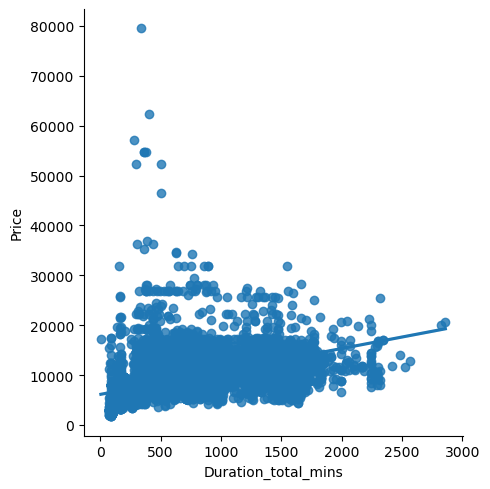

In [38]:
# a plot showing duration impact on airfare price
sns.lmplot(x='Duration_total_mins', y = 'Price', data = data)

In [39]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [40]:
dest_count = data['Destination'].value_counts()
dest_count

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: ylabel='Destination'>

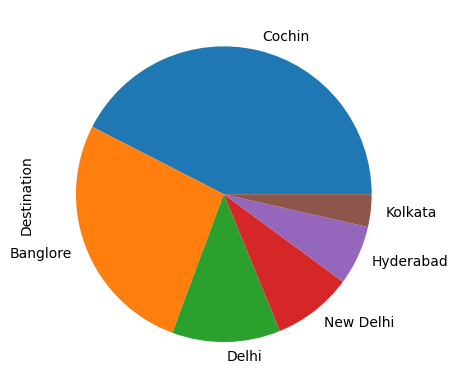

In [41]:
dest_count.plot(kind='pie')

In [42]:
route_count =data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = True).head(10)

In [43]:
pd.DataFrame(route_count, columns = ['count'])

,count
Route,
DEL → CCU → BOM → COK,1
BOM → DED → DEL → HYD,1
BOM → VNS → DEL → HYD,1
BOM → IDR → DEL → HYD,1
BOM → JDH → DEL → HYD,1
BOM → UDR → DEL → HYD,1
DEL → DED → BOM → COK,2
BOM → BDQ → DEL → HYD,2
BLR → BOM → JDH → DEL,3


<Axes: ylabel='Route'>

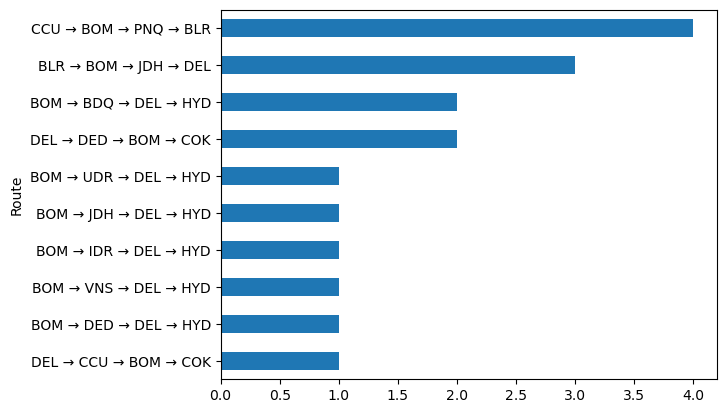

In [44]:
route_count.plot(kind='barh')

<Axes: xlabel='Airline', ylabel='Price'>

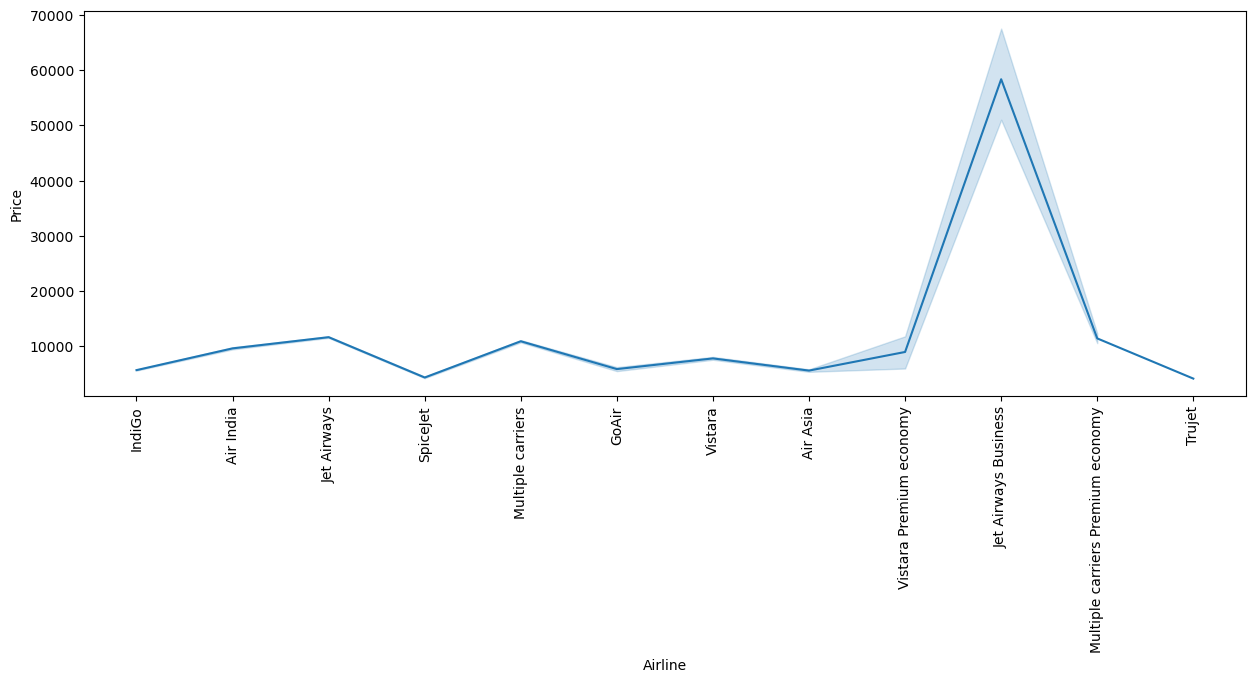

In [45]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.lineplot(data = data, x = 'Airline', y= 'Price')

<Axes: xlabel='Airline', ylabel='Price'>

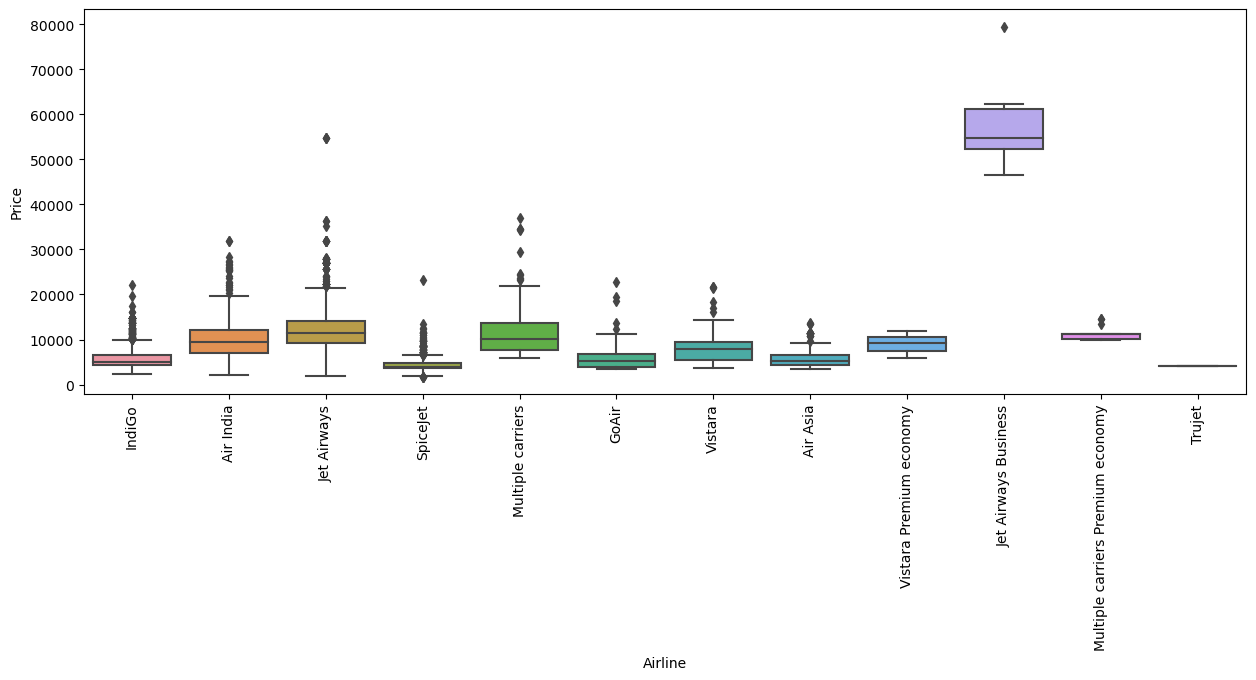

In [46]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.boxplot(data = data, x = 'Airline', y= 'Price')

In [47]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,7,25,445


In [48]:
#dropping irrelevant columns
data.drop(columns=['Additional_Info','Route','Duration_total_mins'],axis=1, inplace=True)

In [49]:
data.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,16,50,21,35,4,45


In [50]:
cat_col = [col for col in data.columns if data[col].dtype=='object']   #Fetching categorical columns

In [51]:
num_col = [col for col in data.columns if data[col].dtype!='object']   #Fetching numerical columns

### Applying One Hot Encoding on Category columns

In [52]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [53]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [54]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [55]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,5,23,30,5,25,0,1,0,0,0


### Applying Target Guided Encoding on Airline Column

In [56]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [57]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [58]:
#The enumerate function automatically generates SERIAL numbers for each rows/indexes in the dictionary
dict1 = {key:index for index, key in enumerate(airlines, 0)} 
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [59]:
data['Airline'] = data['Airline'].map(dict1) #maps the dictionary created to the Airline column

In [60]:
data['Airline'] 

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [61]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,7,25,0,1,0,0,0


### Applying Target guided encoding on Destination column

In [62]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [63]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True) #using the replace function

In [64]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [65]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [66]:
dict2 = {key:index for index, key in enumerate(dest, 0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [67]:
data['Destination'] = data['Destination'].map(dict2)

In [68]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,9,25,4,25,19,0,0,0,1,0,0


### Applying manual coding on Total_Stops column

In [69]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [70]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [71]:
data['Total_Stops'] = data['Total_Stops'].map(stops)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### Dealing with outliers

In [72]:
def plot(df, col):
    fig, (ax1,ax2,ax3) =plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient='horizontal')
    sns.distplot(df[col], ax=ax3, kde=False)

/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/1706376998.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/1706376998.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




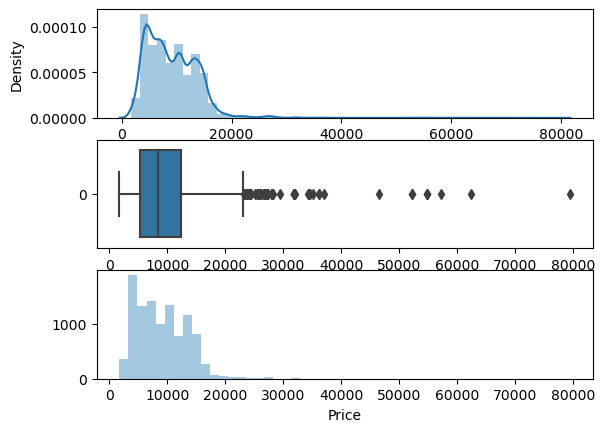

In [73]:
plot(data, 'Price')

In [74]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(), data['Price'])

/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/1706376998.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/1706376998.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




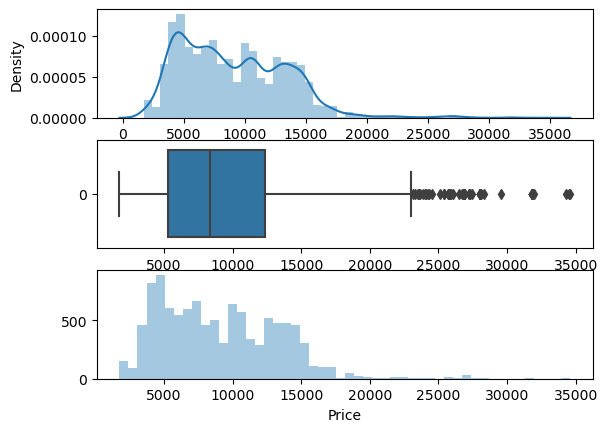

In [75]:
plot(data, 'Price')

### Feature Selection

In [76]:
from sklearn.feature_selection import mutual_info_regression

In [77]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,50,13,15,7,25,0,1,0,0,0


In [78]:
data.drop(columns = ['Source','Duration'],axis=1, inplace = True)

In [79]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,50,13,15,7,25,0,1,0,0,0


<Axes: >

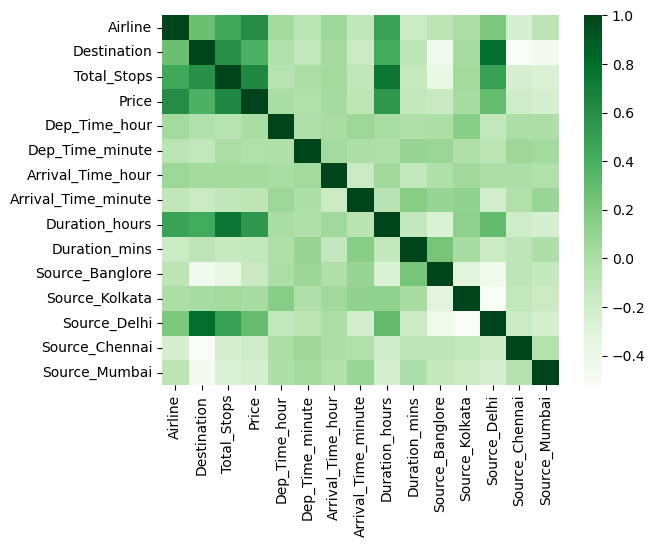

In [80]:
corr = data.corr()
sns.heatmap(corr, cmap='Greens')

In [81]:
X=data.drop(['Price'],axis=1)

In [82]:
y=data['Price']

In [83]:
imp = (pd.DataFrame(mutual_info_regression(X,y), index=X.columns, columns = ['importance'])
       .sort_values(by = 'importance', ascending = False))
imp

,importance
Destination,1.011238
Airline,0.992333
Total_Stops,0.796328
Source_Delhi,0.531653
Duration_hours,0.467336
Source_Kolkata,0.456874
Arrival_Time_hour,0.395736
Source_Banglore,0.393656
Arrival_Time_minute,0.356247
Dep_Time_hour,0.346429


### Applying machine learning model on cleaned data

In [84]:
#Building ML model
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

### Creating Mean Absolute Percentage Error Function

In [86]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [87]:
from sklearn import metrics

### Function to handle multiple predictions

In [88]:
def predict(ML_model):
    model = ML_model.fit(X_train , y_train)
    print(f'The Training Score: {(model.score(X_train , y_train)*100).round(2)}%')
    print('\n')
    ML_pred = model.predict(X_test)
    print(f'Predictions are: {ML_pred}')
    print('\n')
    r2_score = metrics.r2_score(y_test, ML_pred)
    print(f'r2 score: {(r2_score*100).round(2)}%')
    print(f'MAE: {metrics.mean_absolute_error(y_test, ML_pred).round(2)}')
    print(f'MSE score: {metrics.mean_squared_error(y_test, ML_pred).round(2)}')
    print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y_test, ML_pred)).round(2)}')
    print(f'MAPE score: {mape(y_test, ML_pred).round(2)}')
    sns.distplot(y_test - ML_pred)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
RF_model = RandomForestRegressor()

The Training Score: 78.11%


Predictions are: [16681.1964238   5465.54271612  8412.03292594 ...  7116.25208464
 12582.73265379 12641.02231273]


r2 score: 59.86%
MAE: 1680.04
MSE score: 8083241.29
RMSE score: 2843.1
MAPE score: 18.15


/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/2805831956.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




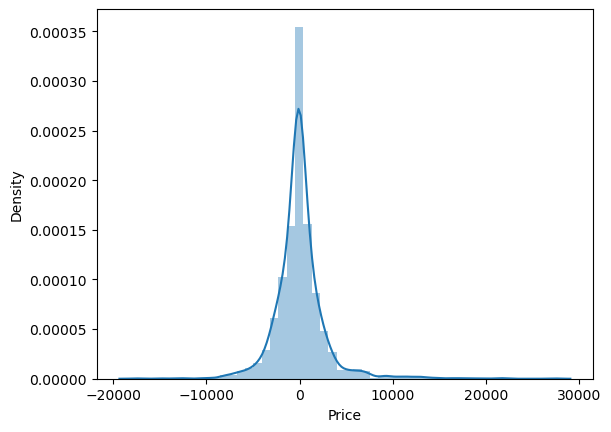

In [91]:
predict(RF_model)

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
DT_model = DecisionTreeRegressor()

The Training Score: 78.69%


Predictions are: [16663.44444444  5457.08333333  8444.57142857 ...  7104.1
 13339.         12673.75      ]


r2 score: 53.48%
MAE: 1770.14
MSE score: 9366778.31
RMSE score: 3060.52
MAPE score: 19.02


/var/folders/46/3v21xb2j5blfk54lnvvzs00c0000gn/T/ipykernel_15545/2805831956.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




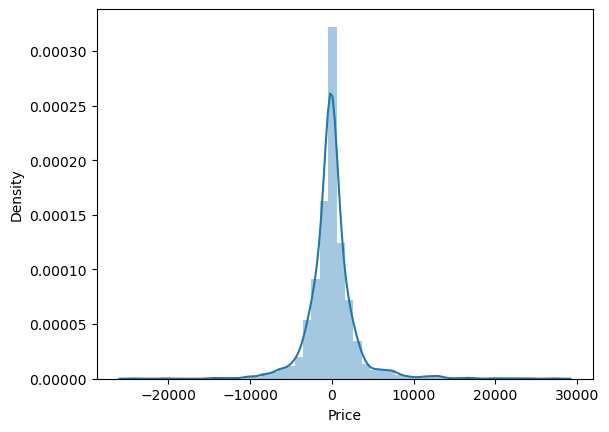

In [94]:
predict(DT_model)